<a href="https://colab.research.google.com/github/SeanMin00/DS_Bootcamp_NYU/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Visualization with Air Quality Data
Dataset: Air Quality in India

 This project is intended to explore India's air pollution levels over the years using the provided dataset. The dataset represents a combined and cleaned version of the Historical Daily Ambient Air Quality Data .
Problem Statement:
The primary goal of this project is to analyze India's air pollution data and derive meaningful insights. Identify local trends in air quality, examine the correlation between air quality changes and shifts in environmental policies in India, and explore factors influencing air pollution levels.

# Tasks:

●      Explore the dataset to understand its structure and features.

●      Identify key pollutants and their variations over the years.

●      Temporal Analysis:
Analyze air quality trends over the years.
Identify any seasonal patterns or significant changes.

●      Regional Trends:
Investigate regional variations in air quality.

●      Explore differences in pollution levels between states and cities.

●      Create visualizations to illustrate trends, patterns, and regional variations in air quality.

●      Predictive Modeling: If feasible, consider building predictive models for air quality based on historical data.

●      Evaluate model performance and explore its potential application.

Students are encouraged to draw connections between data-driven insights and potential policy implications. The project should foster a deeper understanding of the dynamics of air quality in India and its impact on public health and the environment.

Suggested Timeline :
➔    Week 1: Project introduction and Dataset Exploration

◆    Team formation (4-5 students).

◆    Introduction to the project,
objectives, and Air quality dataset.

◆    Dataset acquisition and initial exploration.

➔    Week 2: Feature Exploration

◆    Data manipulation using Numpy and Pandas.

◆    Exploring the dataset.

➔    Week 3-4: EDA & Visualization

◆    Data manipulation using Numpy and Pandas.

◆    Exploring EDA and visualization techniques.

◆    Select relevant features and formulate the problem statement.

➔    Week 5: Mid-Program Presentation

◆    Present progress achieved till the EDA stage.

◆    Receiving feedback and suggestions for further analysis.

➔    Week 6: Initial Modeling

◆    Begin experimenting with different ML models

◆    Train Initial model and evaluate performance.

➔    Week 7: Hypothesis Testing

◆    Formulate hypothesis related to factors influencing air quality.

◆    Conduct hypothesis testing and statistical analysis.

➔    Week 8: Final Model Training and Interpretation

◆    Train final predictive models incorporating insights from previous analysis.

◆    Interpret results, summarize key insights

➔    Week 9: Final Presentation

◆    Present methodology, results and insights

2. Sentiment Analysis of Social Media Content
Dataset: Social Media Sentiment Analysis Dataset

This project aims to analyze user-generated content across various social media platforms to uncover sentiment trends and user behavior. The dataset offers a rich source of data, including text-based content, user sentiments, timestamps, hashtags, user engagement metrics (likes and retweets), and geographical information. By exploring this data, we can identify how emotions fluctuate over time, platform, and geography. We will also investigate the correlation between popular content and user engagement metrics.

Problem Statement:
The primary goal is to perform sentiment analysis, investigate temporal and geographical trends in user-generated content, and analyze platform-specific user behavior. The project will focus on identifying popular topics through hashtags, exploring engagement levels, and understanding regional differences in sentiment trends.
Tasks:





# ●      Explore the dataset to understand its structure and features.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data.csv', encoding='ISO-8859-1')


print(data.shape)
print(data.columns)

data.head(3)

(435742, 13)
Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')


<ipython-input-12-1da0d457a4c4>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv', encoding='ISO-8859-1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

### Conclusion

the result of data.shape is (435742, 13)

each colomns are below:
- 'stn_code':  **Station Code**
- 'sampling_date', **Sampling Date (Month/Year)**
- 'state', **State Name**
- 'location', **Location Name**
- 'agency', **Agency Name**
- 'type', **Area Type**
- 'so2', **SO₂ Concentration (µg/m³)**
- 'no2', **NO₂ Concentration (µg/m³)**
- 'rspm', **RSPM/PM₁₀ Concentration (µg/m³)**
- 'spm', **SPM Concentration (µg/m³)**
- 'location_monitoring_station', **Monitoring Station Description**
- 'pm2_5', **PM₂.₅ Concentration (µg/m³)**
- 'date', **Observation Date (YYYY-MM-DD)**







#●      Identify key pollutants and their variations over the years.


In [ ]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
data['year'] = data['date'].dt.year

pollutant_trends = data.groupby('year')[['pm2_5', 'no2', 'so2']].mean()

print(pollutant_trends)

            pm2_5        no2        so2
year                                   
1987.0        NaN  30.584545  21.827070
1988.0        NaN  30.606439  22.098102
1989.0        NaN  29.215816  18.668066
1990.0        NaN  25.714482  17.723147
1991.0        NaN  25.986805  17.607667
1992.0        NaN  30.702058  17.719765
1993.0        NaN  30.227629  21.958892
1994.0        NaN  31.764829  22.478851
1995.0        NaN  33.078066  26.000877
1996.0        NaN  26.503318  20.645564
1997.0        NaN  28.093305  21.279954
1998.0        NaN  27.252315  20.031752
1999.0        NaN  28.404223  20.288986
2000.0        NaN  29.006001  16.913942
2001.0        NaN  28.699950  15.250711
2002.0        NaN  27.131232  13.151781
2003.0        NaN  21.499148   6.557118
2004.0        NaN  28.045844  11.534257
2005.0        NaN  28.500495  12.829259
2006.0        NaN  26.626594  11.308434
2007.0        NaN  26.474942  11.654908
2008.0        NaN  27.688674  11.269949
2009.0        NaN  25.991634  10.730822


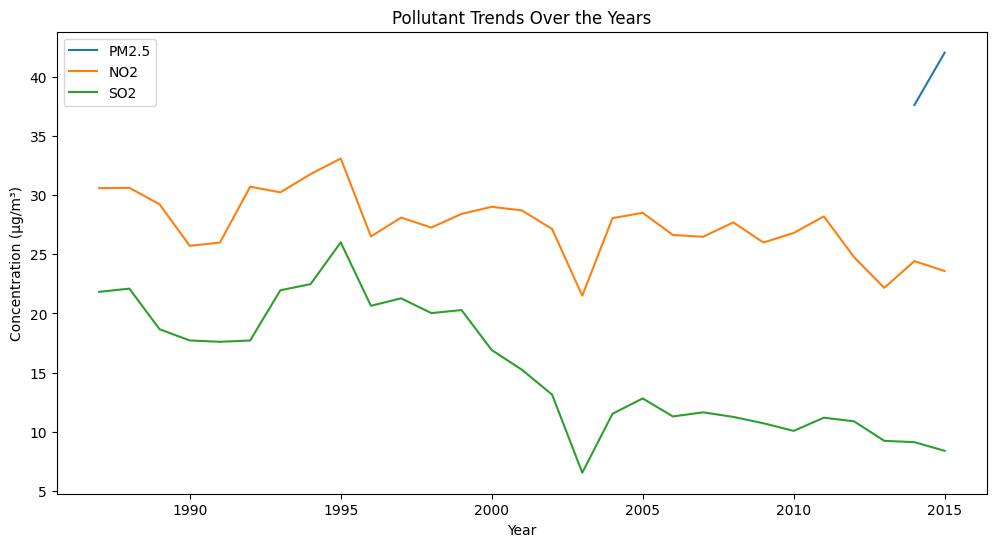

In [ ]:
#visualization
plt.figure(figsize=(12, 6))
plt.plot(pollutant_trends.index, pollutant_trends['pm2_5'], label='PM2.5')
plt.plot(pollutant_trends.index, pollutant_trends['no2'], label='NO2')
plt.plot(pollutant_trends.index, pollutant_trends['so2'], label='SO2')
plt.xlabel('Year')
plt.ylabel('Concentration (µg/m³)')
plt.title('Pollutant Trends Over the Years')
plt.legend()
plt.show()


# ●      Temporal Analysis:Analyze air quality trends over the years. Identify any seasonal patterns or significant changes.


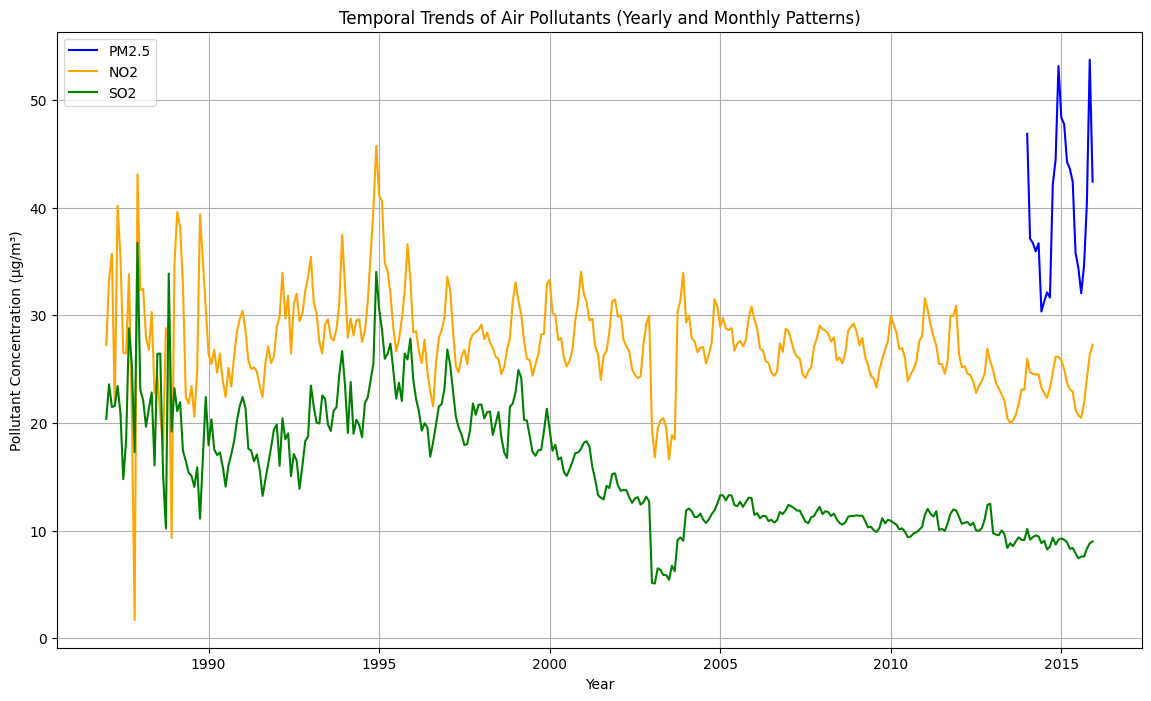

In [ ]:
rawData['date'] = pd.to_datetime(rawData['date'], errors='coerce')
rawData['year'] = rawData['date'].dt.year
rawData['month'] = rawData['date'].dt.month

temporal_trends = rawData.groupby(['year', 'month'])[['pm2_5', 'no2', 'so2']].mean().reset_index()

plt.figure(figsize=(14, 8))

plt.plot(temporal_trends['year'] + (temporal_trends['month'] - 1) / 12, temporal_trends['pm2_5'], label='PM2.5', color='blue')
plt.plot(temporal_trends['year'] + (temporal_trends['month'] - 1) / 12, temporal_trends['no2'], label='NO2', color='orange')
plt.plot(temporal_trends['year'] + (temporal_trends['month'] - 1) / 12, temporal_trends['so2'], label='SO2', color='green')

plt.title('Temporal Trends of Air Pollutants (Yearly and Monthly Patterns)')
plt.xlabel('Year')
plt.ylabel('Pollutant Concentration (µg/m³)')
plt.legend()
plt.grid()
plt.show()

# ●      Regional Trends: Investigate regional variations in air quality.


In [ ]:
regional_means = data.groupby(['state', 'location'])[['so2', 'no2', 'rspm', 'spm', 'pm2_5']].mean().reset_index()

print(regional_means.head())

            state    location       so2        no2        rspm         spm  \
0  Andhra Pradesh  Ananthapur  4.651235  11.188272   77.969136         NaN   
1  Andhra Pradesh    Chittoor  4.591226  11.013958   55.427572  104.472222   
2  Andhra Pradesh       Eluru  5.127119  20.830508  103.920000         NaN   
3  Andhra Pradesh      Guntur  4.270223  16.203025   81.369427  198.926606   
4  Andhra Pradesh   Hyderabad  5.695207  26.131641   84.964622  218.223793   

   pm2_5  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN  


# ●      Explore differences in pollution levels between states and cities.


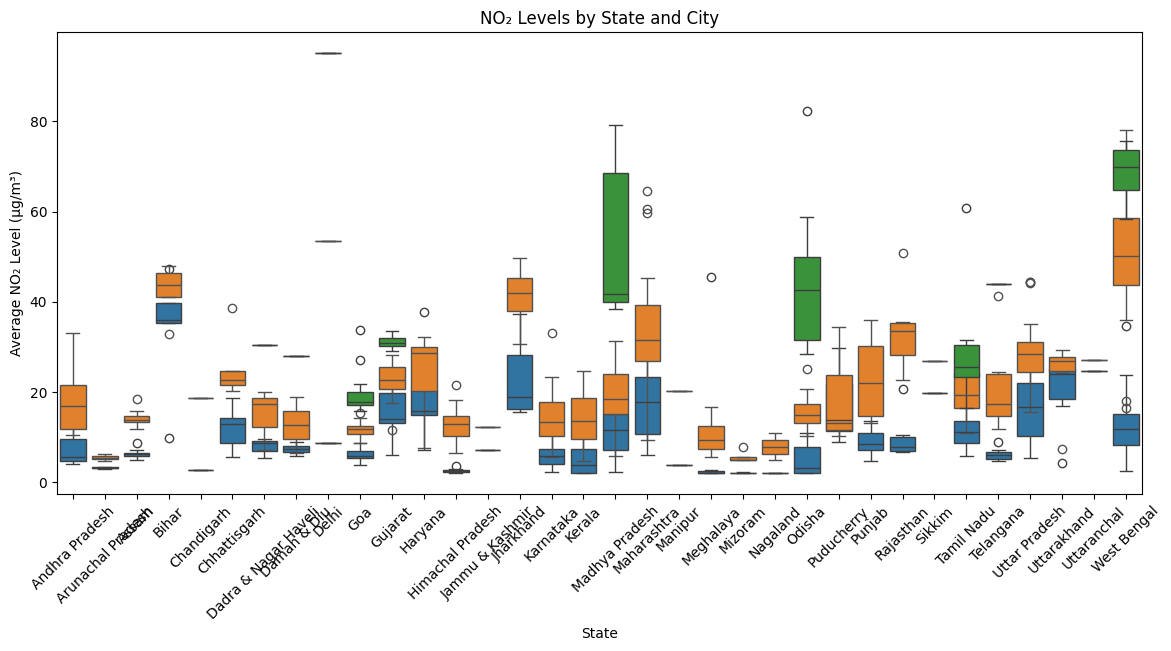

In [ ]:
plt.figure(figsize=(14, 6))
plt.title('NO₂ Levels by State and City')
plt.xlabel('State')
plt.ylabel('Average NO₂ Level (µg/m³)')
plt.xticks(rotation=45)

sns.boxplot(data=regional_means, x='state', y='so2')
sns.boxplot(data=regional_means, x='state', y='no2')
sns.boxplot(data=regional_means, x='state', y='pm2_5')

plt.show()



# ●      Create visualizations to illustrate trends, patterns, and regional variations in air quality.

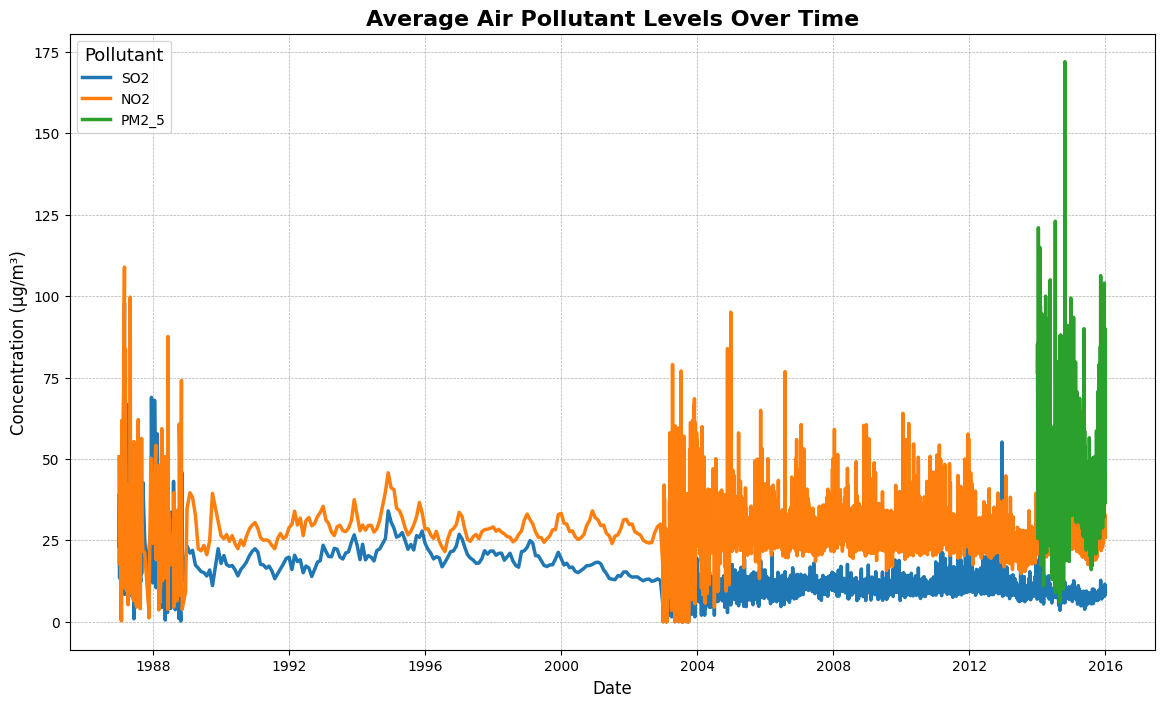

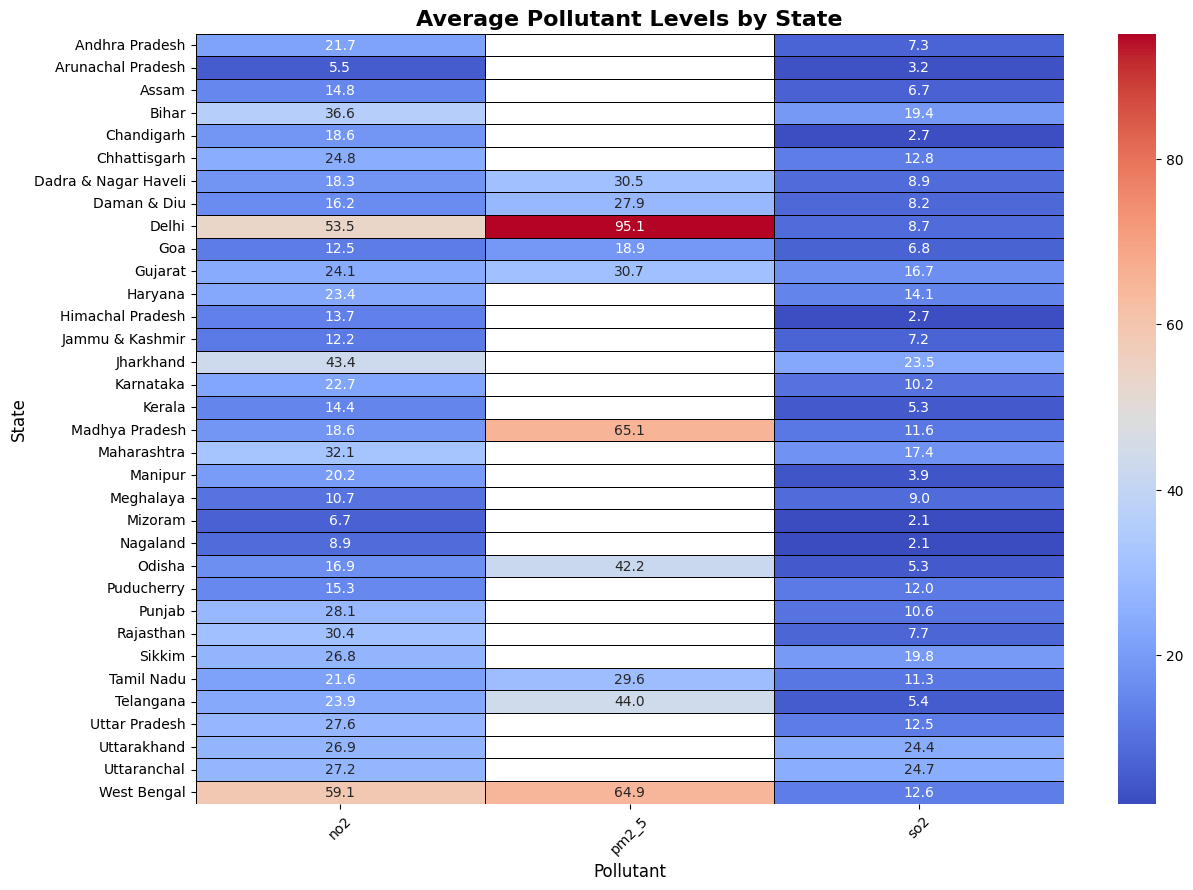

In [ ]:
plt.figure(figsize=(14, 8))
for pollutant in ['so2', 'no2', 'pm2_5']:
    time_series = data.groupby('date')[pollutant].mean()
    sns.lineplot(data=time_series, label=pollutant.upper(), linewidth=2.5)

plt.title('Average Air Pollutant Levels Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Concentration (µg/m³)', fontsize=12)
plt.legend(title='Pollutant', fontsize=10, title_fontsize='13')
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5)
plt.show()

plt.figure(figsize=(14, 10))
pivot_table = data.pivot_table(values=['so2', 'no2', 'pm2_5'], index='state', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, linecolor='black')

plt.title('Average Pollutant Levels by State', fontsize=16, fontweight='bold')
plt.xlabel('Pollutant', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(rotation=45)
plt.show()



●      Predictive Modeling: If feasible, consider building predictive models for air quality based on historical data.

<ipython-input-38-4ee957ed594b>:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv', encoding='ISO-8859-1')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Val

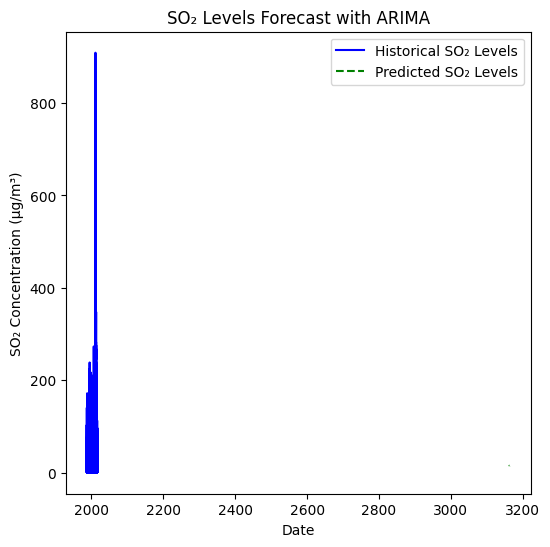

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data['so2'] = data['so2'].fillna(data['so2'].mean())


arima_model = ARIMA(data['so2'], order=(1, 1, 1))  # order=(p, d, q)
arima_fit = arima_model.fit()


forecast = arima_fit.forecast(steps=30)


plt.figure(figsize=(6, 6))
plt.plot(data.index, data['so2'], label='Historical SO₂ Levels', color='blue')
plt.plot(forecast.index, forecast, label='Predicted SO₂ Levels', color='green', linestyle='--')
plt.title('SO₂ Levels Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('SO₂ Concentration (µg/m³)')
plt.legend()
plt.show()

●      Evaluate model performance and explore its potential application.
